In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
training_datain=np.zeros((2,45))
training_datain[0]=np.array([-1,-0.9,-0.9,-0.9,-0.8,-1,-0.9,-0.9,-0.9,-0.8,-1,-0.9,-0.9,-0.9,-0.8,-0.1,0,0,0,0.1,-0.1,0,0,0,0.1,-0.1,0,0,0
                                ,0.1,0.8,0.9,0.9,0.9,1,0.8,0.9,0.9,0.9,1,0.8,0.9,0.9,0.9,1])
training_datain[1]=np.array([0.9,1,0.9,0.8,0.9,0,0.1,0,-0.1,0,-0.9,-0.8,-0.9,-1,-0.9,0.9,1,0.9,0.8,0.9,0,0.1,0,-0.1,0,-0.9,-0.8,-0.9,-1,-0.9
                                ,0.9,1,0.9,0.8,0.9,0,0.1,0,-0.1,0,-0.9,-0.8,-0.9,-1,-0.9])


In [2]:
training_dataout=np.array([1,1,1,1,1,3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3,
                           3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

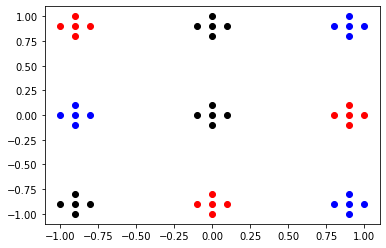

In [3]:
for i in range (len(training_datain[0])):
    if training_dataout[i]==1:
        plt.plot(training_datain[0][i],training_datain[1][i],'ro')
    elif training_dataout[i]==2:
        plt.plot(training_datain[0][i],training_datain[1][i],'ko')
    elif training_dataout[i]==3:
        plt.plot(training_datain[0][i],training_datain[1][i],'bo')

In [4]:
cluster=9
epoch=5
epoch1=100
input_number=2
s_w=np.zeros((3,9))
for j in range(3):
    for i in range(9):
        s_w[j][i]=random.random()*2-1
w=np.zeros((2,9))
w[0]=np.array([-0.9,-0.9,-0.9,0,0,0,0.9,0.9,0.9])
w[1]=np.array([0.9,0,-0.9,0.9,0,-0.9,0.9,0,-0.9])
learning_rate=0.1
learning_rate1=0.01
false1=0;
color=['go','mo','bo','co','ro','ko','k*','g*','m*']

In [5]:
%matplotlib inline
class_=np.zeros((5,45))
unsupervised_test=np.zeros((2,1000))
judge2=np.zeros((1000,cluster))
judge2=judge2.tolist()
min_index2=np.zeros(1000)    
plt.figure(1)
plt.ion()
plt.show()    

<Figure size 432x288 with 0 Axes>

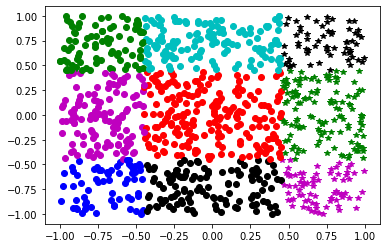

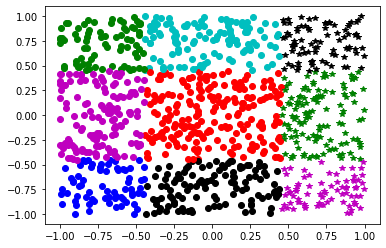

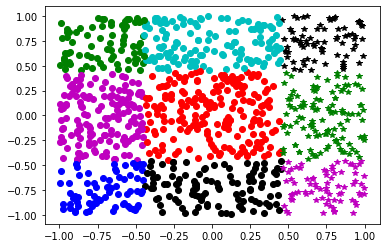

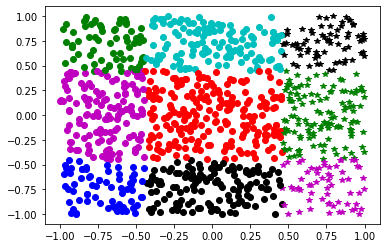

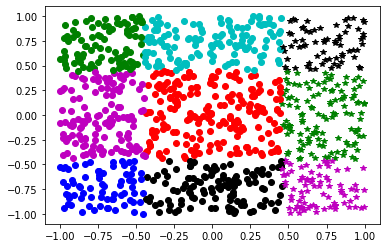

In [6]:
for i in range (epoch):  
        
    for j in range(len(training_datain[0])):
        judge=np.zeros(cluster)
        for k in range(len(w[0])):
            judge[k]=(w[0][k]-training_datain[0][j])**2+(w[1][k]-training_datain[1][j])**2
        judge=judge.tolist()
        temp=min(judge)
        min_index=judge.index(temp) 
        class_[i][j]=min_index
        w[:,min_index]=w[:,min_index]+learning_rate*(training_datain[:,j]-w[:,min_index])
    
    temp_=np.zeros(1000)
    for b in range(1000):
        unsupervised_test[0][b]=random.random()*2-1
        unsupervised_test[1][b]=random.random()*2-1
        for k in range(len(w[0])):
            judge2[b][k]=(w[0][k]-unsupervised_test[0][b])**2+(w[1][k]-unsupervised_test[1][b])**2   
        temp_[b]=min(judge2[b])
        min_index2=np.argmin(judge2, axis=1)
   
    for b in range(1000):        
        if b==1:
            plt.cla()          
        plt.plot(unsupervised_test[0,b],unsupervised_test[1,b],color[min_index2[b]])
        plt.ion()
    plt.pause(0.001)


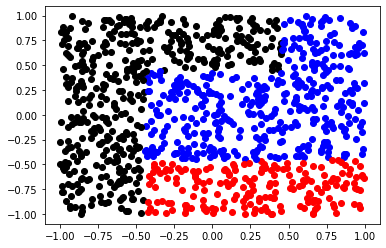

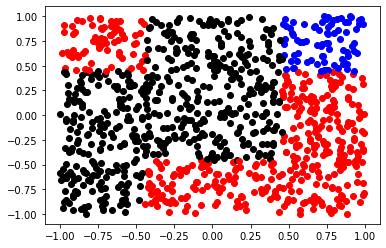

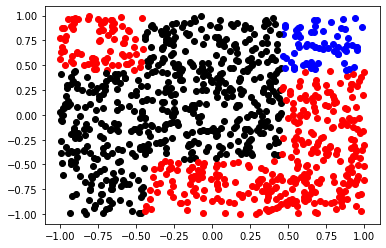

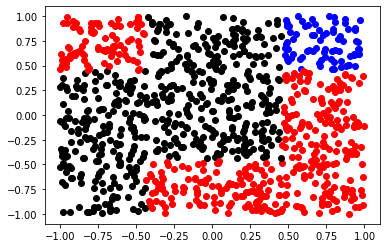

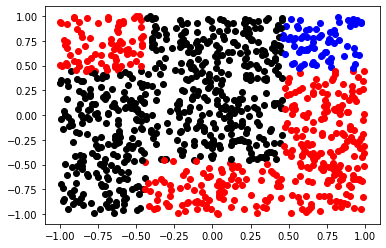

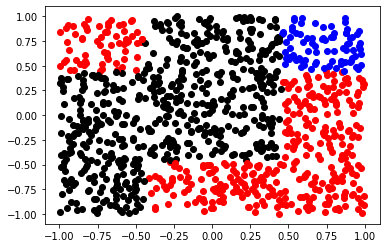

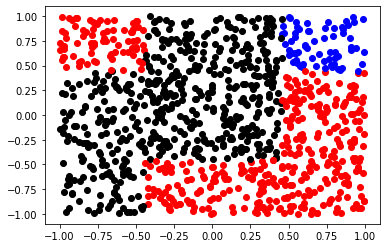

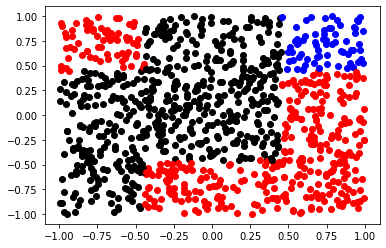

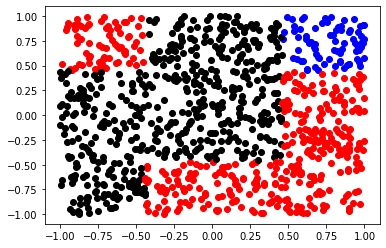

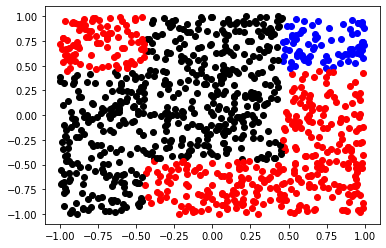

In [7]:
output=np.zeros(3)
error=np.zeros(3)
s_input=len(w[0])
MSE=np.zeros(100)
judge3=np.zeros((1000,cluster))
supervised_test=np.zeros((2,1000))
network_output3=np.zeros(3)
output3=np.zeros((1000,3))
output31=np.zeros((1000,1))

for i in range(epoch1):
    for j in range(len(training_datain[0])):
        for k in range (3):
            output[k]=s_w[k,int(class_[epoch-1,j])]*1+np.sum(s_w[k])*false1
            if k == training_dataout[j]:            
                error[k]=1-output[k]
            else:            
                error[k]=-1-output[k]
        for k in range (3):
            for m in range(len(w[0])):
                if m==int(class_[epoch-1,j]):
                    s_w[k,m]=s_w[k,m]+learning_rate1*error[k]*1
                else:
                    s_w[k,m]=s_w[k,m]+learning_rate1*error[k]*1*false1
        for k in range(3):
            temp=temp+error[k]**2   
            
    MSE[i]=temp/((i+1)*len(training_datain))
    MSE[i]=MSE[i]/100
    
    if i%10==0:
        for b in range(1000):
            supervised_test[0][b]=random.random()*2-1
            supervised_test[1][b]=random.random()*2-1
            for k in range(len(w[0])):
                judge3[b,k]=(w[0,k]-supervised_test[0,b])**2+(w[1,k]-supervised_test[1,b])**2
            temp1=min(judge3[b])            
            min_index3=np.argmin(judge3[b], axis=0)
            for k in range(3):
                network_output3[k]=s_w[k,min_index3]*0.9+np.sum(s_w[k])*false1
            output3[b]=network_output3
            temp1=max(output3[b])
            output31[b]=np.argmax(output3[b], axis=0)
            
            
        plt.figure(1)
        for b in range(1000):
            if b==1:
                plt.cla() 
            if output31[b]==0:
                plt.plot(supervised_test[0,b],supervised_test[1,b],'bo')  
                
            elif output31[b]==1:
                plt.plot(supervised_test[0,b],supervised_test[1,b],'ro')
                
            elif output31[b]==2:
                plt.plot(supervised_test[0,b],supervised_test[1,b],'ko')
    plt.ion()
    plt.pause(1e-100)

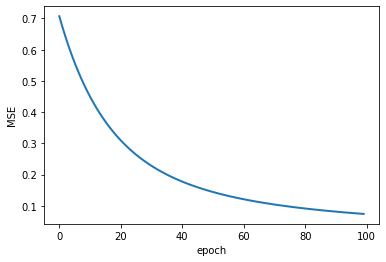

In [8]:
epoch1_=np.zeros(100)
for i in range(epoch1):
    epoch1_[i]=i
plt.figure(1)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.plot(epoch1_,MSE,lw=2)

In [9]:
output1=np.zeros((45,3))
network_output=np.zeros(3)
output=np.zeros(45)
for i in range(len(training_datain[0])):
    for k in range(3):
        network_output[k]=s_w[k,int(class_[epoch-1,i])]*0.9+np.sum(s_w[k])*false1
    output1[i]=network_output
    temp=max(output1[i])
    output[i]=np.argmax(output1[i], axis=0)    

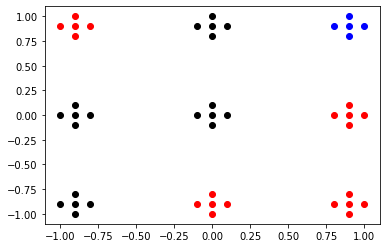

In [10]:
plt.figure(1)
for i in range (len(training_datain[0])):
    if output[i]==0:
        plt.plot(training_datain[0,i],training_datain[1,i],'bo')  
    elif output[i]==1:
        plt.plot(training_datain[0,i],training_datain[1,i],'ro')  
    elif output[i]==2:
        plt.plot(training_datain[0,i],training_datain[1,i],'ko')  
    
        
        